In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



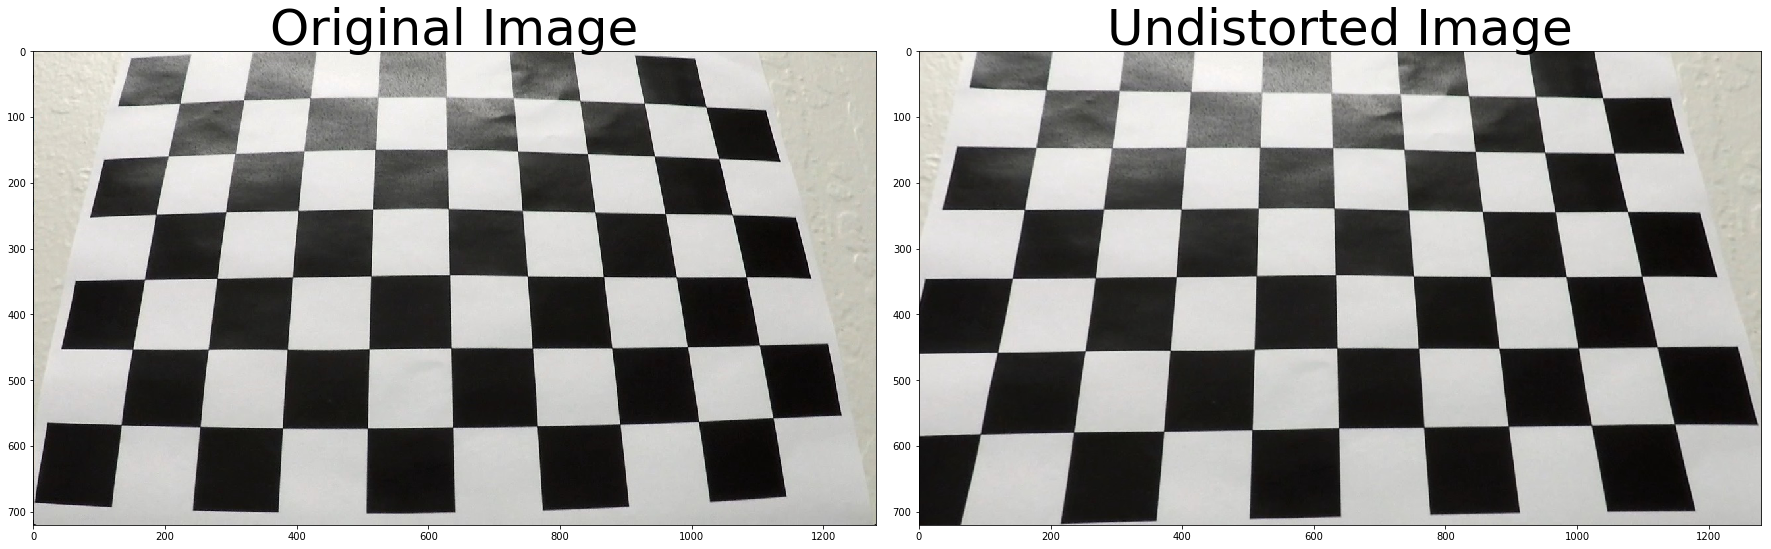

In [15]:
nx = 9
ny = 6

def calculate_camera_matrix_dist_coeffs():
    objpoints = []
    imgpoints = []

    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    fnames = glob.glob("camera_cal/calibration*.jpg")

    for fname in fnames:
        img = mpimg.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
        if ret:
            objpoints.append(objp)
            imgpoints.append(corners)

    # use the object and image points to caliberate the camera and compute the camera matrix and distortion coefficients
    ret, cameraMatrix, distortionCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2],None,None)
    return (cameraMatrix, distortionCoeffs)

def undistort(img, cameraMatrix, distortionCoeffs):
    return cv2.undistort(img, cameraMatrix, distortionCoeffs, None, cameraMatrix)

def show_original_processed_img(img, processed):
    # Plot the original and undistorted images
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(processed)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
# Make a list of calibration images
fnames = glob.glob('test_images/*.jpg')

mtx, dist = calculate_camera_matrix_dist_coeffs()

for fname in fnames:
    img = mpimg.imread(fname)
    undistorted = undistort(img, mtx, dist)
    show_original_processed_img(img, undistorted)
